<a href="https://colab.research.google.com/github/vishwanathbeena/appliedai_practice/blob/main/Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='red'>Clustering Assignment</font>

**There will be some functions that start with the word "grader" ex: grader_actors(), grader_movies(), grader_cost1() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

**Please check [clustering assignment helper functions](https://drive.google.com/file/d/1V29KhKo3YnckMX32treEgdtH5r90DIjU/view?usp=sharing) notebook before attempting this assignment.**

*  Read graph from the given <font color='blue'>movie_actor_network.csv</font> (note that the graph is bipartite graph.)

*  Using stellergaph and gensim packages, get the dense representation(128dimensional vector) of every node in the graph. [Refer <font color='blue'>Clustering_Assignment_Reference.ipynb</font>]

* Split the dense representation into actor nodes, movies nodes.(Write you code in <font color='blue'>def data_split()</font>)


# <font color='red'>Task 1 : Apply clustering algorithm to group similar actors</font>

 1. For this task consider only the actor nodes 
 2. Apply any clustering algorithm of your choice <br>
    Refer : https://scikit-learn.org/stable/modules/clustering.html
 3. Choose the number of clusters for which you have maximum score of <b>$Cost1*Cost2$</b><br>
 4. Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters 
<br> (Write your code in <font color='blue'>def cost1()</font>)<br>
 5. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 
 <br> (Write your code in <font color='blue'>def cost2()</font>)<br>
 6. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node <br>
 7. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
 8. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color

<img src='https://i.imgur.com/4SPYPFa.jpg'>

# <font color='red'>Task 2 : Apply clustering algorithm to group similar movies</font>


1. For this task consider only the movie nodes
2. Apply any clustering algorithm of your choice
3.Choose the number of clusters for which you have maximum score of $Cost1*Cost2$ <br>

    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br>
(Write your code in <font color='blue'>def cost1()</font>)<br>
	
4. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of movie nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(number of unique actor nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}$ 
where N= number of clusters 
<br>(Write your code in <font color='blue'>def cost2()</font>)<br>


**Algorithm for actor nodes**

<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
        You can get the labels for corresponding actor nodes (algo.labels_)
        Create a graph for every cluster(ie., if n_clusters=3, create 3 graphs)
        (You can use ego_graph to create subgraph from the actual graph)
        compute cost1,cost2 
           (if n_cluster=3, cost1=cost1(graph1)+cost1(graph2)+cost1(graph3) # here we are doing summation
            cost2=cost2(graph1)+cost2(graph2)+cost2(graph3)
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

<br>

In [ ]:
# !pip install networkx==2.3
# !pip install stellargraph

In [ ]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
# you need to have tensorflow 
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph

In [ ]:
data=pd.read_csv('/content/movie_actor_network.csv', index_col=False, names=['movie','actor'])

In [ ]:
edges = [tuple(x) for x in data.values.tolist()]

In [ ]:
B = nx.Graph()
B.add_nodes_from(data['movie'].unique(), bipartite=0, label='movie')
B.add_nodes_from(data['actor'].unique(), bipartite=1, label='actor')
B.add_edges_from(edges, label='acted')

In [ ]:
A = list(B.subgraph(c) for c in nx.connected_components(B))[0]

In [ ]:
print("number of nodes", A.number_of_nodes())
print("number of edges", A.number_of_edges())

number of nodes 4703
number of edges 9650


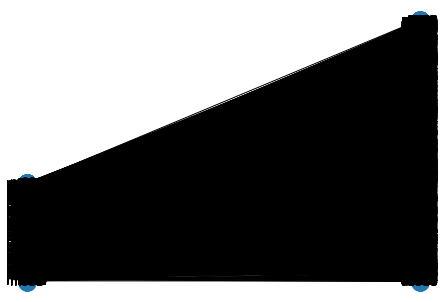

In [ ]:
l, r = nx.bipartite.sets(A)
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
  
nx.draw(A, pos=pos, with_labels=True)
plt.show()

In [ ]:
movies = []
actors = []
for i in A.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies ', len(movies))
print('number of actors ', len(actors))

number of movies  1292
number of actors  3411


In [ ]:

# Create the random walker
rw = UniformRandomMetaPathWalk(StellarGraph(A))

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(A.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=1,        # number of random walks per root node 
               metapaths=metapaths
              )

print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(walks, size=128, window=5)

In [ ]:
model.wv.vectors.shape  # 128-dimensional vector for each node in the graph

(4703, 128)

In [ ]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [ A.nodes[node_id]['label'] for node_id in node_ids]

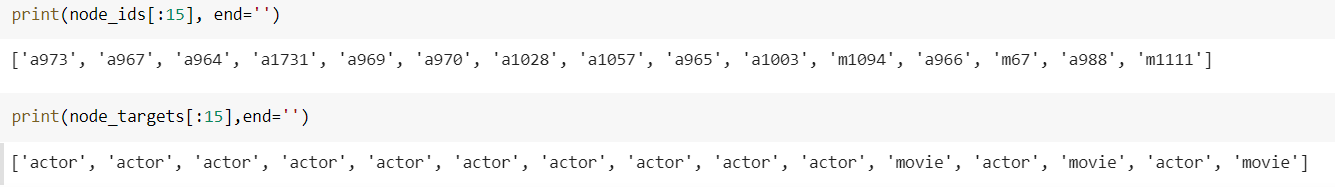

In [ ]:
def data_split(node_ids,node_targets,node_embeddings):
    '''In this function, we will split the node embeddings into actor_embeddings , movie_embeddings '''
    actor_nodes,movie_nodes=[],[]
    actor_embeddings,movie_embeddings=[],[]
    # split the node_embeddings into actor_embeddings,movie_embeddings based on node_ids
    # By using node_embedding and node_targets, we can extract actor_embedding and movie embedding
    # By using node_ids and node_targets, we can extract actor_nodes and movie nodes
    for i,node in enumerate(node_ids):
      if 'm' in node:
          movie_nodes.append(node)
          movie_embeddings.append(node_embeddings[i])
      if 'a' in node:
          actor_nodes.append(node)
          actor_embeddings.append(node_embeddings[i])

    return actor_nodes,movie_nodes,actor_embeddings,movie_embeddings


In [ ]:
actor_nodes,movie_nodes,actor_embeddings,movie_embeddings = data_split(node_ids,node_targets,node_embeddings)

<font color='cyan'>Grader function - 1</font>

In [ ]:
def grader_actors(data):
    assert(len(data)==3411)
    return True
grader_actors(actor_nodes)

True

<font color='cyan'>Grader function - 2</font>

In [ ]:
def grader_movies(data):
    assert(len(data)==1292)
    return True
grader_movies(movie_nodes)

True

<font color='blue'>Calculating cost1</font>

Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
<br>

In [ ]:
def cost1(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    # cost1= # calculate cost1 
    total_nodes = graph.number_of_nodes()
    connected_nodes = list(nx.connected_components(graph))
    maxList = max(connected_nodes, key = lambda i: len(i))
    max_connected_nodes = len(maxList)
    cost1 = (1/number_of_clusters)*(max_connected_nodes/total_nodes)    
    return cost1

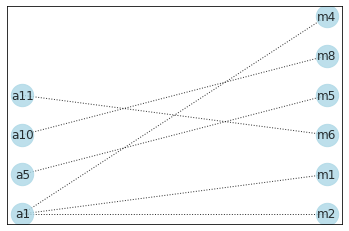

In [ ]:
import networkx as nx
from networkx.algorithms import bipartite
graded_graph= nx.Graph()
graded_graph.add_nodes_from(['a1','a5','a10','a11'], bipartite=0) # Add the node attribute "bipartite"
graded_graph.add_nodes_from(['m1','m2','m4','m6','m5','m8'], bipartite=1)
graded_graph.add_edges_from([('a1','m1'),('a1','m2'),('a1','m4'),('a11','m6'),('a5','m5'),('a10','m8')])
l={'a1','a5','a10','a11'};r={'m1','m2','m4','m6','m5','m8'}
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
nx.draw_networkx(graded_graph, pos=pos, with_labels=True,node_color='lightblue',alpha=0.8,style='dotted',node_size=500)

In [ ]:
print(graded_graph.number_of_nodes())
print(graded_graph.number_of_edges())
print(graded_graph.nodes())
lst1 = len([i for i in graded_graph.nodes() if 'm' in i])
print('new list is',lst1)
print(nx.connected_components(graded_graph))

10
6
['a1', 'a5', 'a10', 'a11', 'm1', 'm2', 'm4', 'm6', 'm5', 'm8']
new list is 6
<generator object connected_components at 0x7f8fa26e0cd0>


<font color='cyan'>Grader function - 3</font>

In [ ]:
graded_cost1=cost1(graded_graph,3)
def grader_cost1(data):
    assert(data==((1/3)*(4/10))) # 1/3 is number of clusters
    return True
grader_cost1(graded_cost1)

True

<font color='blue'>Calculating cost2</font>

Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 

In [ ]:
def cost2(graph,number_of_clusters,node_type):
    '''In this function, we will calculate cost1'''
    # cost2= # calculate cost1 
    sum_of_degress_of_actor = graph.number_of_edges()
    num_of_unique_movie_nodes = len([i for i in graph.nodes() if 'm' in i])
    num_of_unique_actor_nodes = len([i for i in graph.nodes() if 'a' in i])
    if node_type == 'actor': 
      cost2 = (1/number_of_clusters)*(sum_of_degress_of_actor/num_of_unique_movie_nodes)
    else:
      cost2 = (1/number_of_clusters)*(sum_of_degress_of_actor/num_of_unique_actor_nodes)
    return cost2

<font color='cyan'>Grader function - 4</font>

In [ ]:
graded_cost2=cost2(graded_graph,3,'actor')
def grader_cost2(data):
    assert(data==((1/3)*(6/6))) # 1/3 is number of clusters
    return True
grader_cost2(graded_cost2)

True

In [ ]:
print(len(actor_embeddings))
print(len(movie_embeddings))
print(len(actor_embeddings[0]))
print(len(movie_embeddings[0]))

3411
1292
128
128


In [ ]:
def get_bi_partit_graphs(clusters,full_graph):
  graphs = [nx.Graph() for i in range(len(clusters))]
  for index,cluster in enumerate(clusters):
    for node in cluster:
      sub_graph1=nx.ego_graph(full_graph,node)
      graphs[index].add_nodes_from(sub_graph1.nodes)
      graphs[index].add_edges_from(sub_graph1.edges())
  return graphs


<font color='blue'>Grouping similar actors</font>

In [ ]:
from sklearn.cluster import KMeans
k_list = [3,5,8,10]
costs = []
for k in k_list:
  actor_dict = {}
  clusters = [[] for i in range(k)]  
  # costs = [[]for i in range(k)] 
  cost1_loc = 0
  cost2_loc = 0
  kmeans  = KMeans(n_clusters=k,random_state=42)
  kmeans.fit(actor_embeddings)
  labels = kmeans.labels_
  for index,label in enumerate(labels):
    clusters[label].append(actor_nodes[index])
  graphs = get_bi_partit_graphs(clusters,B)
  for i in range(len(graphs)):
    cost1_loc += cost1(graphs[i],k)
    cost2_loc += cost2(graphs[i],k,'actor')
  final_cost = cost1_loc * cost2_loc
  costs.append(final_cost)
print(costs)
#Got better cost for clustering with 3 clusters.

[3.7342504723390704, 2.965276047508811, 2.497235669530788, 2.3449316501067967]


In [ ]:
#Retraining using better cluster numbering which is 3 clusters
#Since we got best cost at 3 clusters  re train using 3 and get the labels.
#divide word embediings into 3 groups based on labels. plot those 3 TSNE word embeddings.
cluster_emedings = [[] for i in range(3)]
kmeans  = KMeans(n_clusters=3,random_state=42)
kmeans.fit(actor_embeddings)
labels = kmeans.labels_
for index,label in enumerate(labels):
  cluster_emedings[label].append(actor_embeddings[index])


<font color='blue'>Displaying similar actor clusters</font>

In [ ]:
from sklearn.manifold import TSNE
transform = TSNE #PCA
trans = transform(n_components=2)
cluster_2d = []
for cluster in cluster_emedings:
  cluster_2d.append(trans.fit_transform(cluster))
print((cluster_2d[0].shape))
print((cluster_2d[1].shape))
print((cluster_2d[2].shape))

(2986, 2)
(68, 2)
(357, 2)


In [ ]:
c1_df = pd.DataFrame(cluster_2d[0],columns=["x", "y"])
c2_df = pd.DataFrame(cluster_2d[1],columns=["x", "y"])
c3_df = pd.DataFrame(cluster_2d[2],columns=["x", "y"])

[]

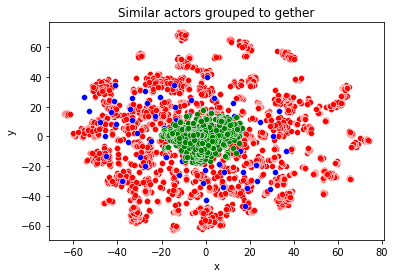

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x='x',y='y',data=c1_df,color='red' )
sns.scatterplot(x='x',y='y',data=c2_df,color='blue' )
sns.scatterplot(x='x',y='y',data=c3_df,color='green' )
plt.title('Similar actors grouped to gether')
plt.plot()


<font color='blue'>Grouping similar movies</font>

In [ ]:
from sklearn.cluster import KMeans
k_list = [3]
costs = []
for k in k_list:
  movie_dict = {}
  clusters = [[] for i in range(k)]  
  # costs = [[]for i in range(k)] 
  cost1_loc = 0
  cost2_loc = 0
  kmeans  = KMeans(n_clusters=k,random_state=42)
  kmeans.fit(movie_embeddings)
  labels = kmeans.labels_
  for index,label in enumerate(labels):
    clusters[label].append(movie_nodes[index])
  graphs = get_bi_partit_graphs(clusters,B)
  for i in range(len(graphs)):
    cost1_loc += cost1(graphs[i],k)
    cost2_loc += cost2(graphs[i],k,'movie')
  final_cost = cost1_loc * cost2_loc
  costs.append(final_cost)
print(costs)

[2.7879652863332303]


In [ ]:
#Got better cost for 10 clusters.Re clustering using 10 clusters.

cluster_emedings = [[] for i in range(3)]
kmeans  = KMeans(n_clusters=3,random_state=42)
kmeans.fit(movie_embeddings)
labels = kmeans.labels_
for index,label in enumerate(labels):
  cluster_emedings[label].append(movie_embeddings[index])




<font color='blue'>Displaying similar movie clusters</font>

In [ ]:
from sklearn.manifold import TSNE
transform = TSNE #PCA
trans = transform(n_components=2)
cluster_2d = []
for cluster in cluster_emedings:
  cluster_2d.append(trans.fit_transform(cluster))

In [ ]:
print((len(cluster_2d[0])))

770


In [ ]:
df_list = []
for index,c in enumerate(cluster_2d):
  df = pd.DataFrame(c,columns=["x", "y"])
  df['cluster_id'] = index
  df_list.append(df)

In [ ]:
final_df= pd.concat(df_list,ignore_index=True)

[]

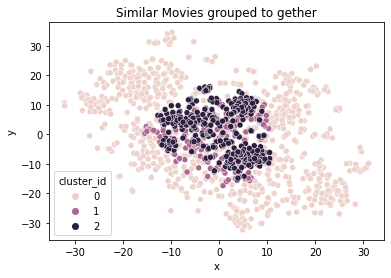

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x='x',y='y',data=final_df,hue='cluster_id' )
plt.title('Similar Movies grouped to gether')
plt.plot()
